In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, correlate, cheby1, filtfilt, decimate, iirnotch, butter, firls
from scipy import signal
from scipy.io.wavfile import read as wavread

In [6]:
path = 'mediciones_simultaneas/DAVID281125.wav'
fs, audio_1 = wavread(path)
audio_1 = audio_1[:,0].astype(np.float32)
# cut from 10 minutes to 6 minutes
audio_1 = audio_1[fs*60*13:fs*60*16]
mean = np.mean(audio_1)
std = np.std(audio_1)

# low-pass filter design cheby1 at 1000 Hz order 3
lowcut = 100.0
b, a = cheby1(3, 0.5, lowcut, btype='low', fs=fs)
filtered_100 = filtfilt(b, a, audio_1)
# band-pass filter 20-100 Hz
lowcut = 20.0
highcut = 100.0
b, a = cheby1(3, 0.5, [lowcut, highcut], btype='band', fs=fs)
filtered_20_100 = filtfilt(b, a, audio_1)

/tmp/ipykernel_35370/1004940842.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, audio_1 = wavread(path)


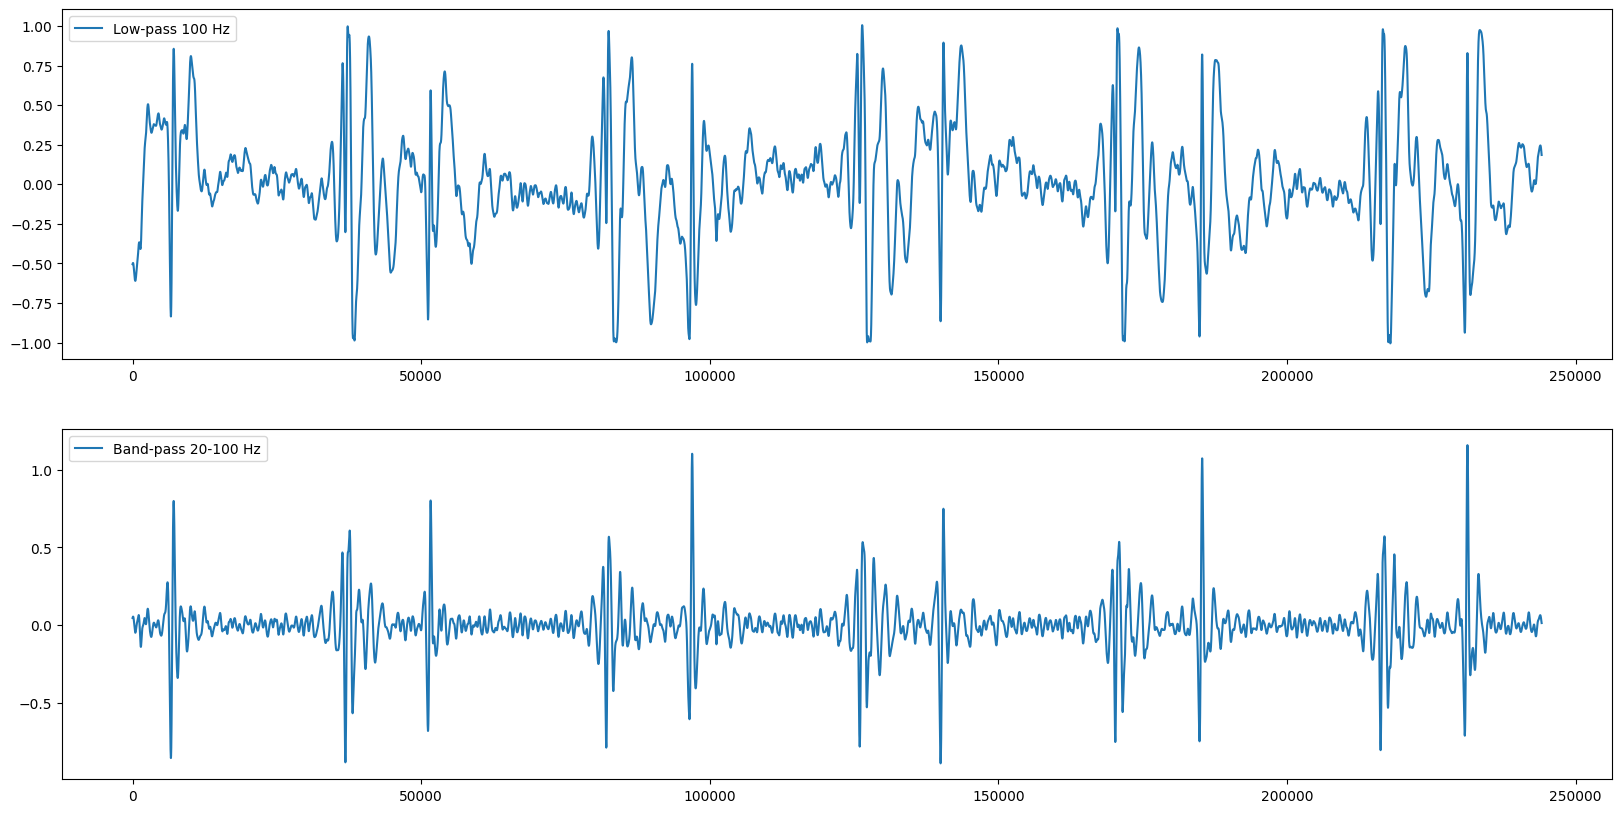

In [9]:
plt.figure(figsize=(20, 10))
plt.subplot(2,1,1)
plt.plot(filtered_100[:244100], label='Low-pass 100 Hz')
plt.legend()
plt.subplot(2,1,2)
plt.plot(filtered_20_100[:244100], label='Band-pass 20-100 Hz')
plt.legend()
plt.show()